# Examen final - 13/05/2024
## Ejercicio 3

### Enunciado

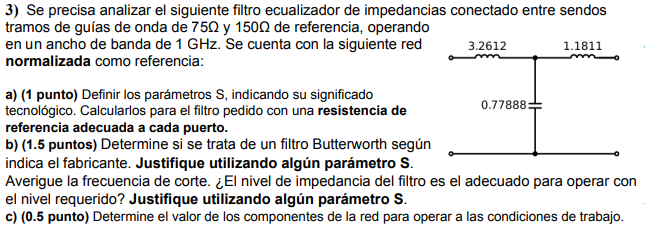

##### Desarrollo del ejercicio

Se realizan cálculos auxiliares en Python para desarrollo manuscrito por simplicidad y agilidad para la resolución. Se intercalan en el desarrollo y se indica en el papel en qué momento se fueron realizando.


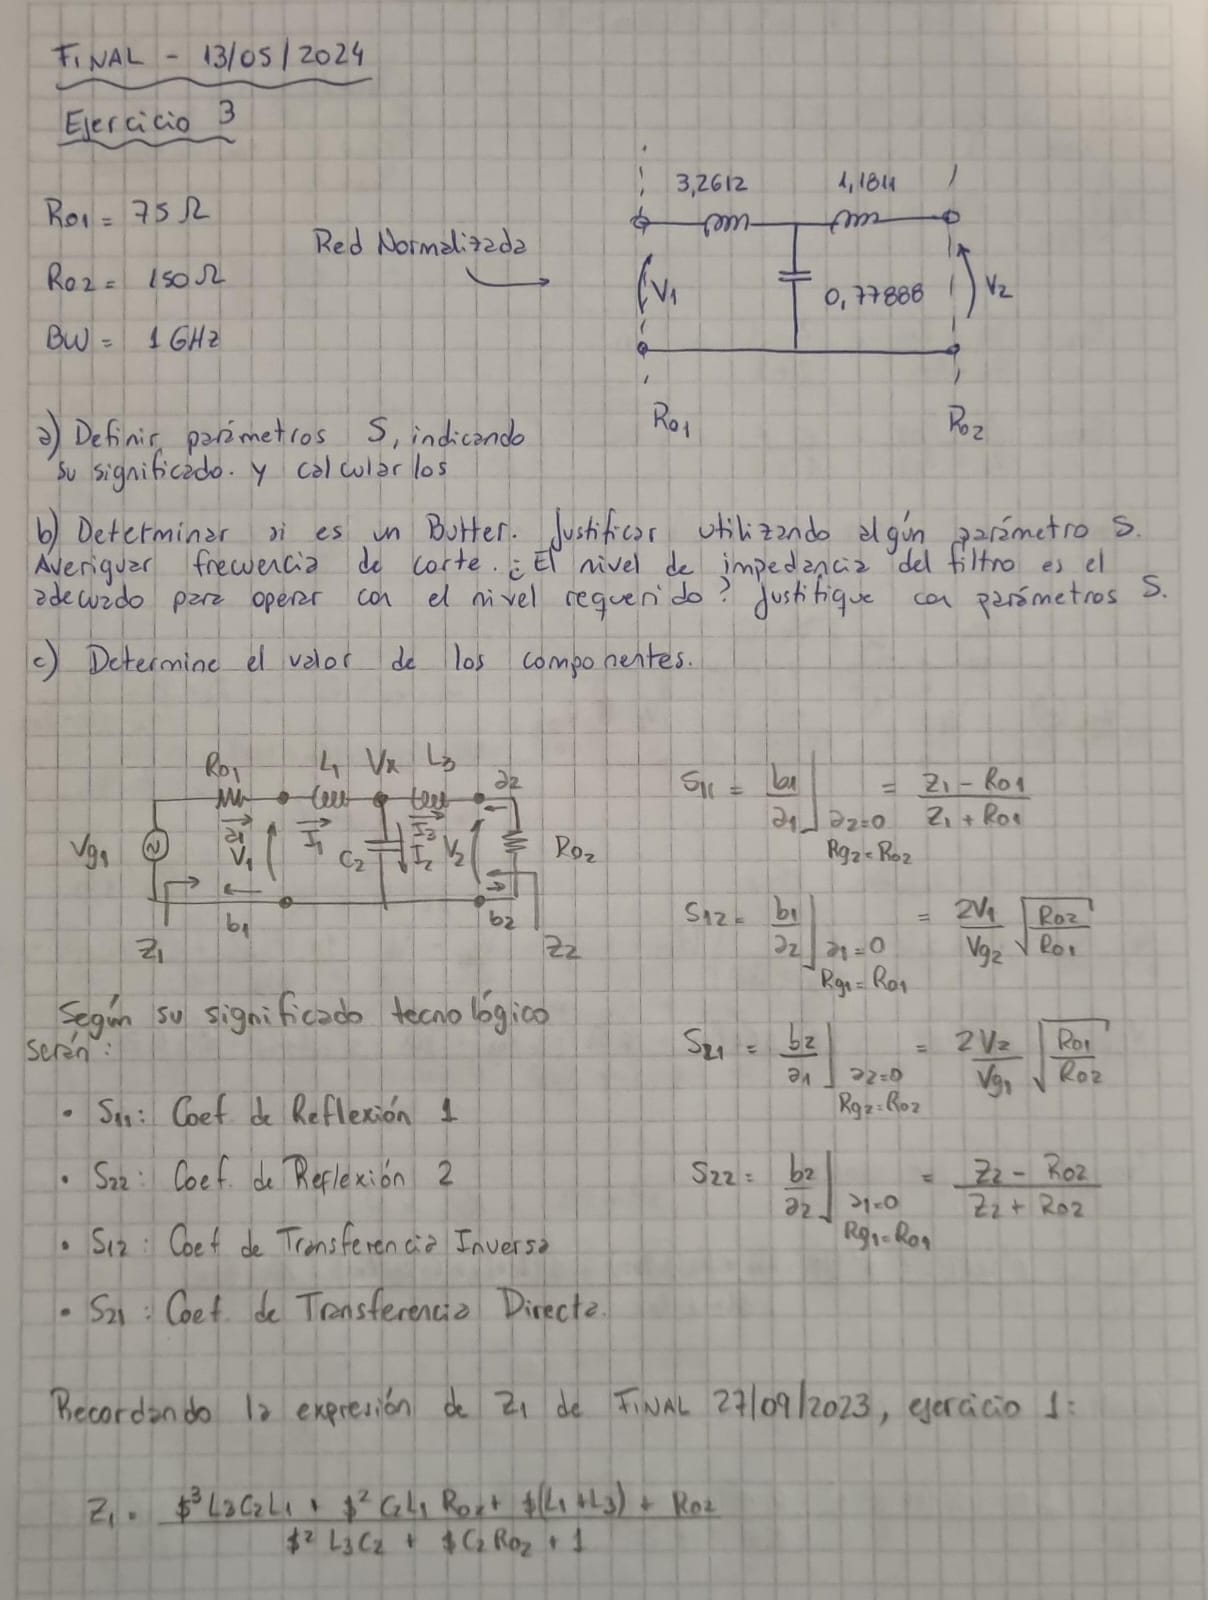

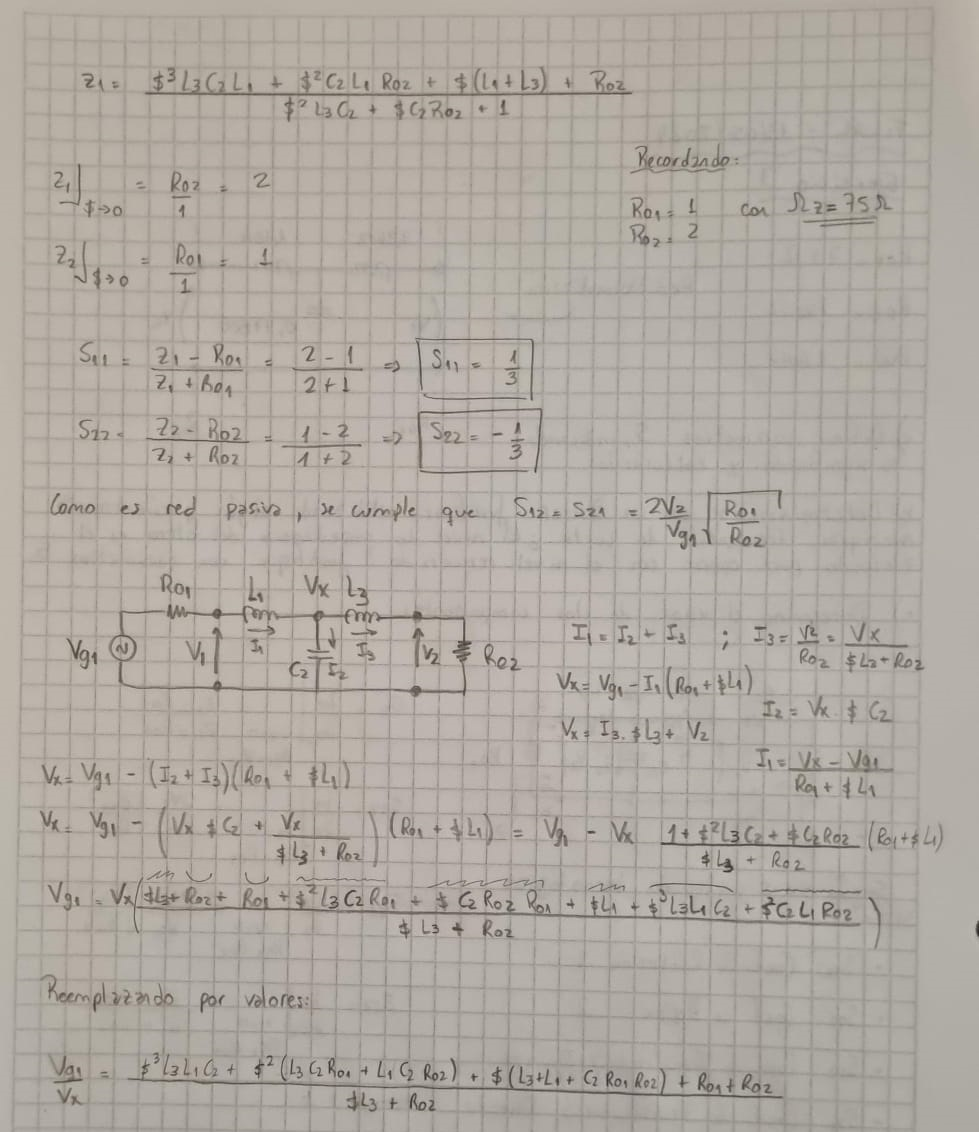

In [17]:
from sympy import *

s = symbols('s')

L_1 = 3.2612
L_3 = 1.1811
C_2 = 0.77888
R_O1 = 1
R_O2 = 2

A = L_1 * C_2 * L_3
B = L_3 * C_2 * R_O1 + C_2 * L_1 * R_O2
C = L_3 + C_2 * R_O1 * R_O2 + L_1
D = R_O1 + R_O2

E = 0
F = 0
G = L_3
H = R_O2


VG1_VX = (A * s**3 + B * s**2 + C * s + D)/(E * s**3 + F * s**2 + G * s + H)

VG1_VX.simplify()

(3.0000925698816*s**3 + 6.00010208*s**2 + 6.00006*s + 3)/(1.1811*s + 2)

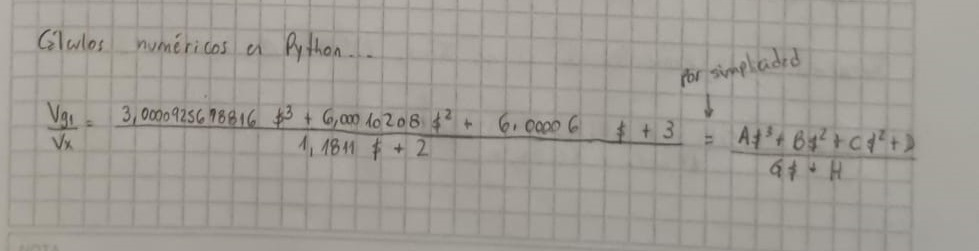

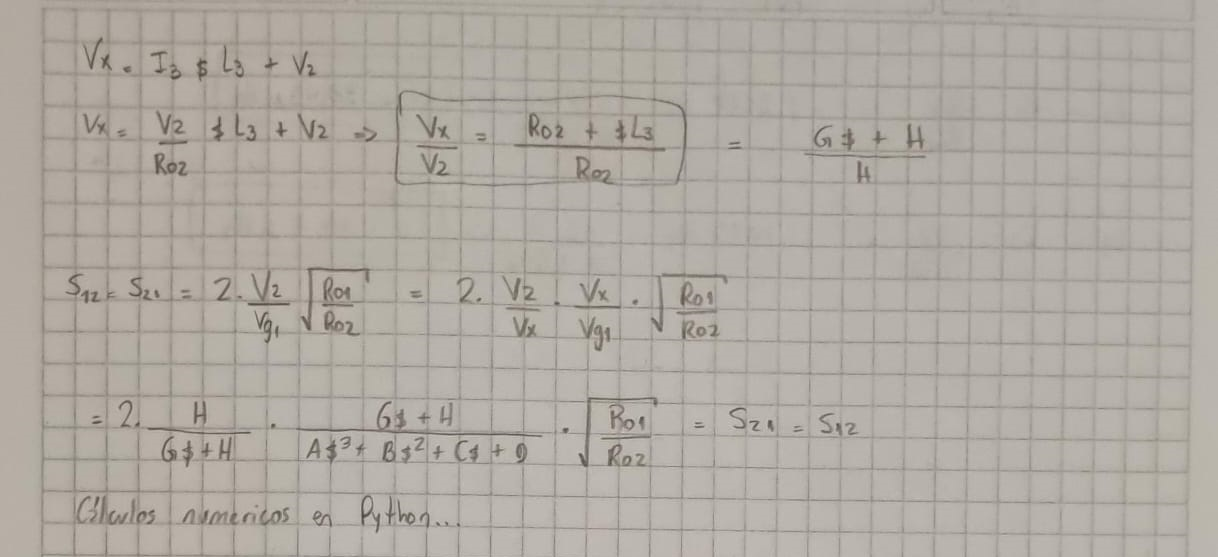

In [19]:
VX_VG1 = 1 / VG1_VX
VX_VG1.simplify()

(1.1811*s + 2)/(3.0000925698816*s**3 + 6.00010208*s**2 + 6.00006*s + 3)

In [20]:
V2_VX = ((H)/(E * s**3 + F * s**2 + G * s + H))
V2_VX.simplify()

2/(1.1811*s + 2)

In [23]:
S_12 = 2 * V2_VX * VX_VG1 * sqrt(R_O1/R_O2)
S_12.simplify()

2.82842712474619/(3.0000925698816*s**3 + 6.00010208*s**2 + 6.00006*s + 3)

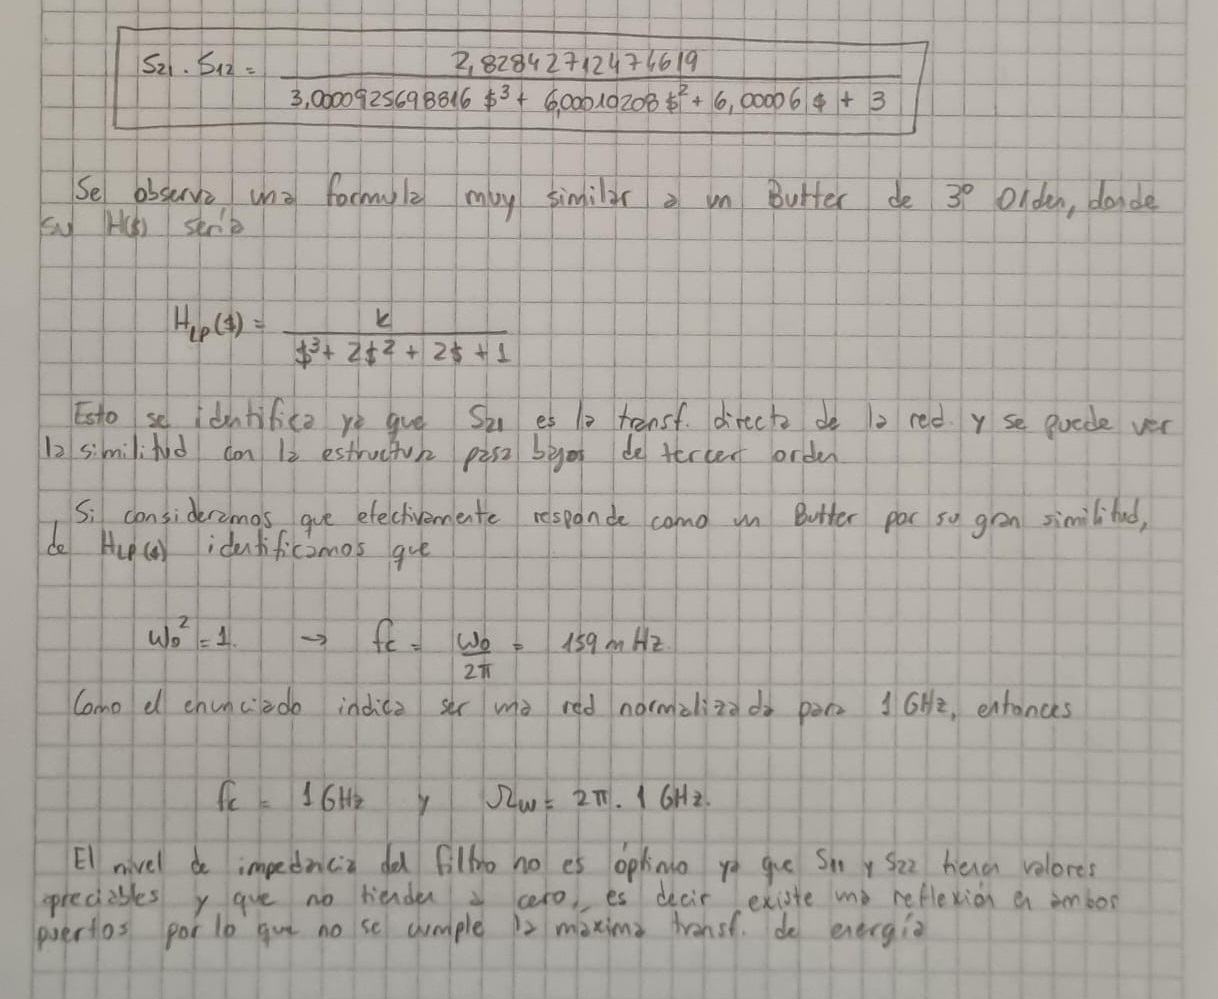

Para simular este comportamiento y validar que $f_c = 159mHz$ vamos a realizarlo en LTSpice:

In [19]:
import math
from engineering_notation import EngNumber

puntos = 1000
inicio = 0.001
fin    = 1000


L_1_N = 3.2612
C_2_N = 0.77888
L_3_N = 1.1811
R_O1_N = 1
R_O2_N = 2

L_1_N_eng = EngNumber(L_1_N)
C_2_N_eng = EngNumber(C_2_N)
L_3_N_eng = EngNumber(L_3_N)
R_O1_N_eng = EngNumber(R_O1_N)
R_O2_N_eng = EngNumber(R_O2_N)


print("Para poner en LTSpice, ploteando con " + str(EngNumber(puntos)) + " puntos, iniciando en " + str(EngNumber(inicio)) + " Hz y terminando en " + str(EngNumber(fin)) + " Hz: ")
print(".ac dec " + str(EngNumber(puntos)) + " " + str(EngNumber(inicio)) + " " + str(EngNumber(fin)))
print(".param L1 " + str(L_1_N_eng))
print(".param C2 " + str(C_2_N_eng))
print(".param L3 " + str(L_3_N_eng))
print(".param R1 " + str(R_O1_N_eng))
print(".param R2 " + str(R_O2_N_eng))

Para poner en LTSpice, ploteando con 1k puntos, iniciando en 1m Hz y terminando en 1k Hz: 
.ac dec 1k 1m 1k
.param L1 3.26
.param C2 778.88m
.param L3 1.18
.param R1 1
.param R2 2


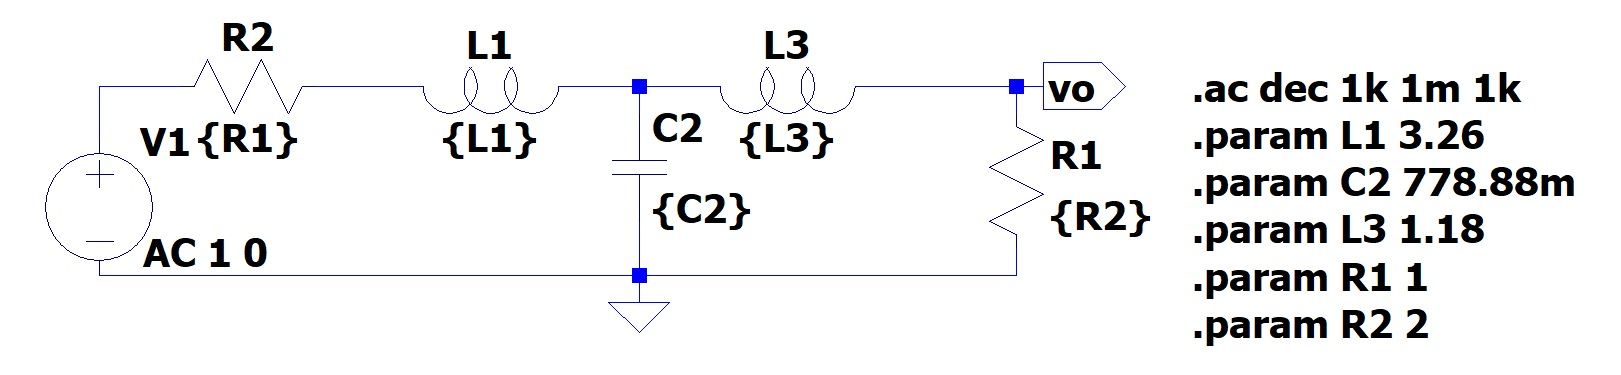

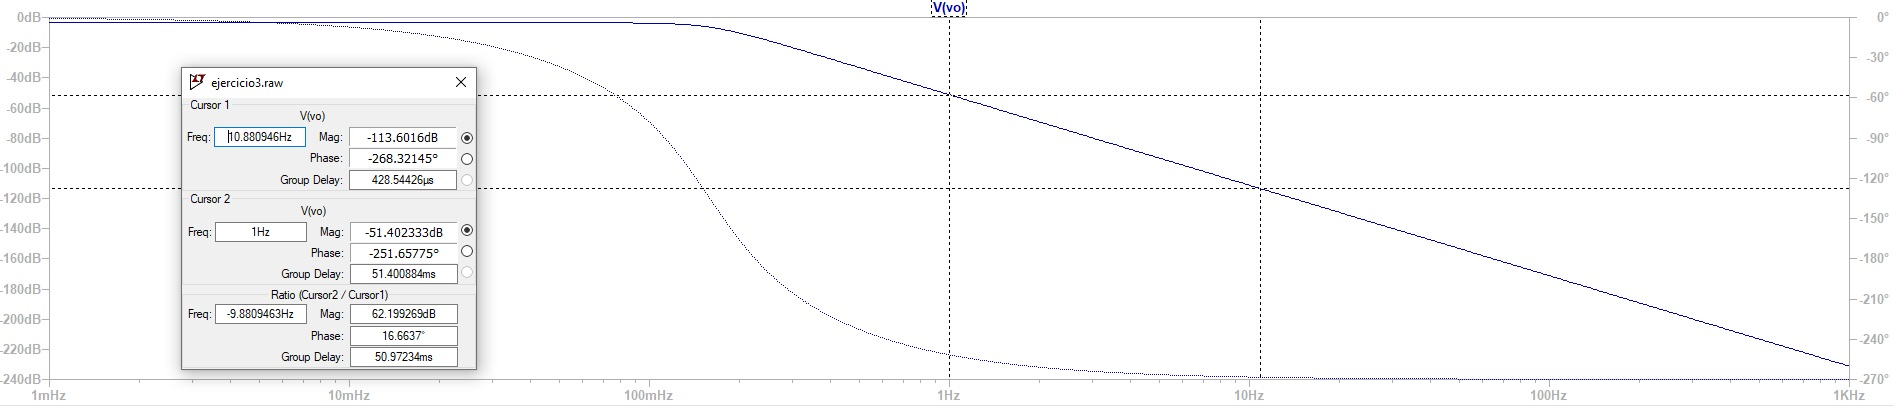

Por lo que se puede comprobar que responde como lo haría un Butter de tercer orden, con una pendiente de $-60\frac{db}{dec}$

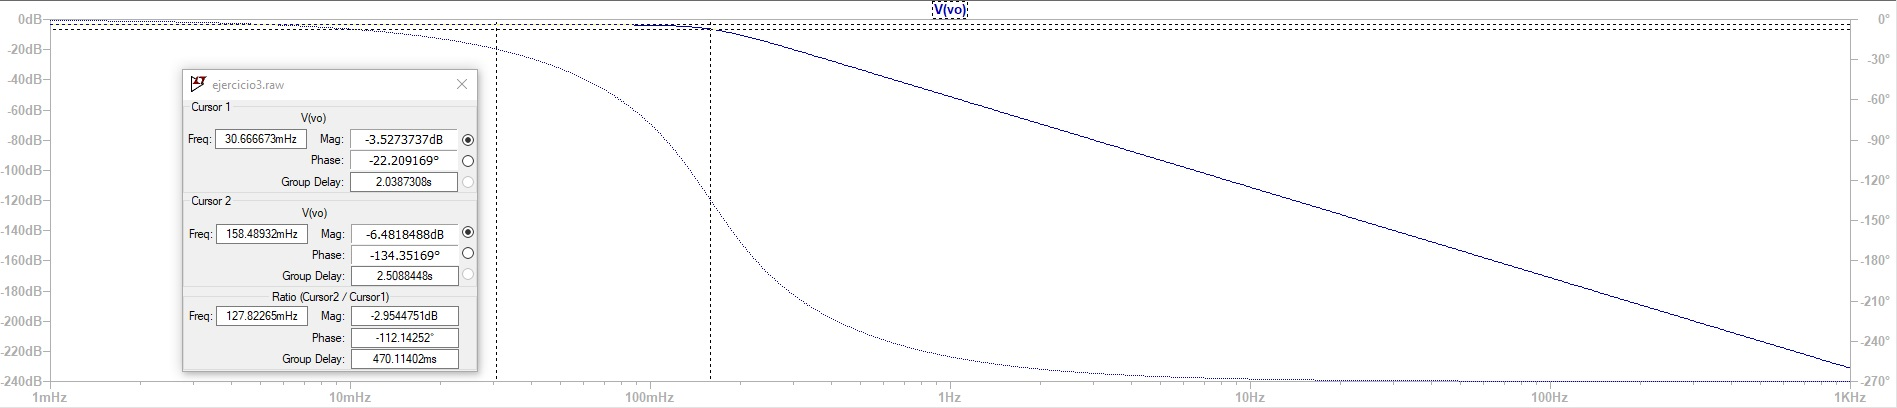

Y también se puede apreciar que para $-3db$ se encuentra en un poquito más de $158mHz$, siendo un valor aproximado por limitaciones de resolución en la simulación.

Finalmente, desnormalizamos los componentes

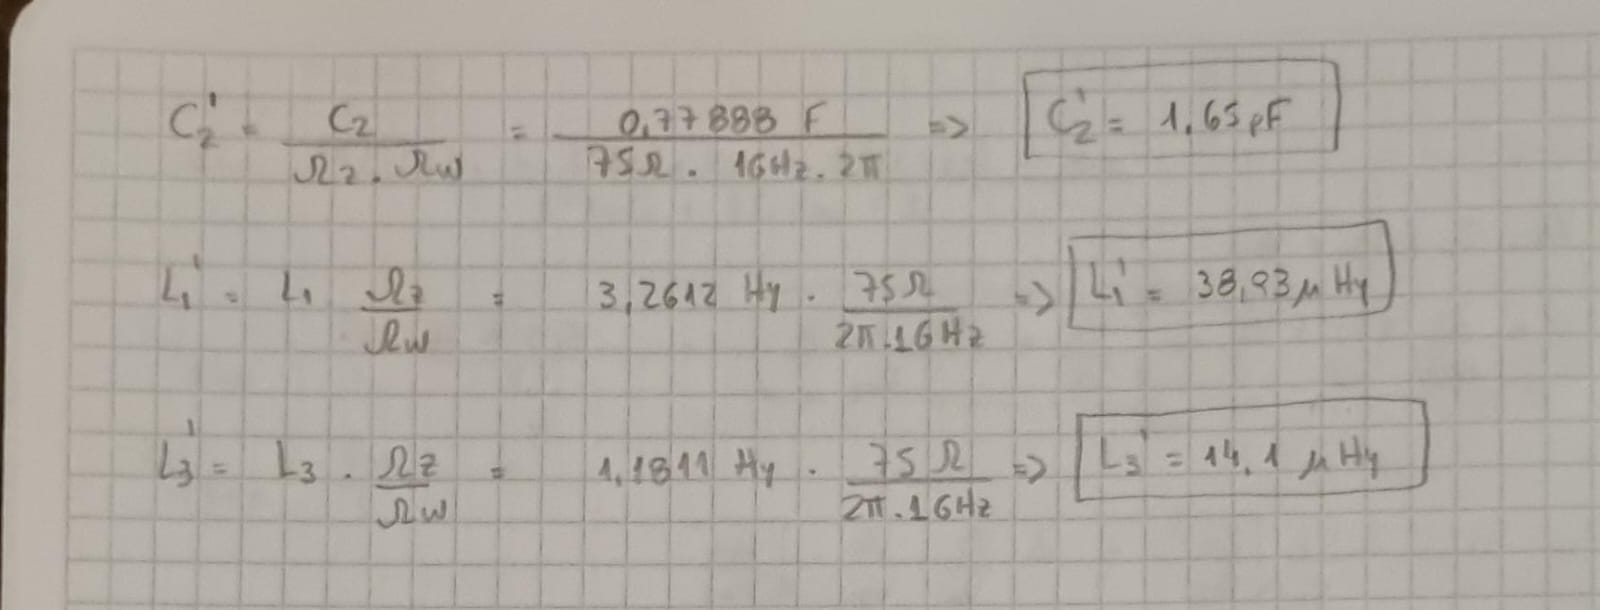

In [20]:
import math
from engineering_notation import EngNumber

puntos = 1000
inicio = 1
fin = 100*10**9


L_1_N = 3.2612
C_2_N = 0.77888
L_3_N = 1.1811
R_O1_N = 1
R_O2_N = 2
NORMA_Z = 75
NORMA_W = 2 * math.pi * 10**9

L_1 = L_1_N * (NORMA_Z / NORMA_W)
C_2 = C_2_N / (NORMA_Z * NORMA_W)
L_3 = L_3_N * (NORMA_Z / NORMA_W)
R_O1 = R_O1_N * NORMA_Z
R_O2 = R_O2_N * NORMA_Z

L_1_eng = EngNumber(L_1)
C_2_eng = EngNumber(C_2)
L_3_eng = EngNumber(L_3)
R_O1_eng = EngNumber(R_O1)
R_O2_eng = EngNumber(R_O2)

print("L_1 desnormalizado: " + str(L_1_eng) + "Hy - " + str(L_1) + "Hy")
print("C_2 desnormalizado: " + str(C_2_eng) + "F - "  + str(C_2) + "F")
print("L_3 desnormalizado: " + str(L_3_eng) + "Hy - " + str(L_3) + "Hy")
print("")
print("Para poner en LTSpice, ploteando con " + str(EngNumber(puntos)) + " puntos, iniciando en " + str(EngNumber(inicio)) + " Hz y terminando en " + str(EngNumber(fin)) + " Hz: ")
print(".ac dec " + str(EngNumber(puntos)) + " " + str(EngNumber(inicio)) + " " + str(EngNumber(fin)))
print(".param L1 " + str(L_1))
print(".param C2 " + str(C_2))
print(".param L3 " + str(L_3))
print(".param R1 " + str(R_O1_eng))
print(".param R2 " + str(R_O2_eng))

L_1 desnormalizado: 38.93nHy - 3.892770753084668e-08Hy
C_2 desnormalizado: 1.65pF - 1.6528346943388724e-12F
L_3 desnormalizado: 14.10nHy - 1.4098342746437819e-08Hy

Para poner en LTSpice, ploteando con 1k puntos, iniciando en 1 Hz y terminando en 100G Hz: 
.ac dec 1k 1 100G
.param L1 3.892770753084668e-08
.param C2 1.6528346943388724e-12
.param L3 1.4098342746437819e-08
.param R1 75
.param R2 150


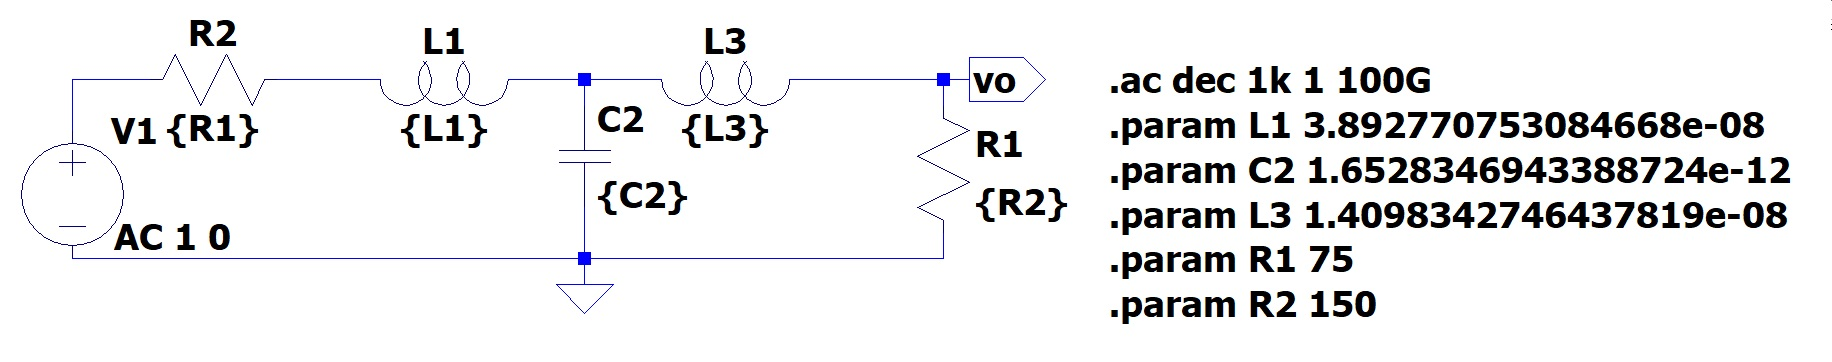

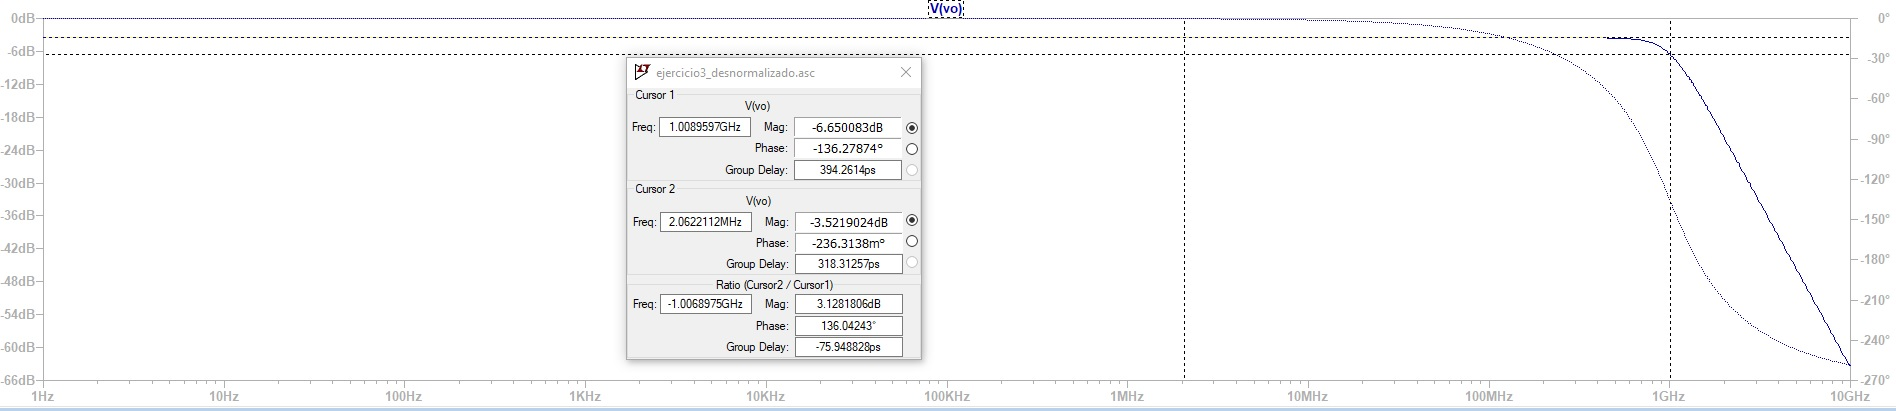